# Sensor Fusion ND 

## Project 2 - Camera Based 2D Feature Tracking

This notebook is used to evaluate the data created by the main c++ project and create images and tables. 

In [1]:
import collections
import json
import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

from pandas.plotting import table
#%matplotlib inline

## 1. Load Data Files

In [2]:
# find files in folder and read data
print(os.getcwd())
data_file_paths = []
for path in glob.glob("../evaluation/*.json"):
    data_file_paths.append(path)
    print(path)

C:\Users\lnzivanc\Documents\udacity\SensorFusionND\Project3\report
../evaluation\eval-detector-AKAZE-AKAZE.json
../evaluation\eval-detector-BRISK-BRIEF.json
../evaluation\eval-detector-BRISK-BRISK.json
../evaluation\eval-detector-BRISK-FREAK.json
../evaluation\eval-detector-BRISK-ORB.json
../evaluation\eval-detector-BRISK-SIFT.json
../evaluation\eval-detector-BRISK-SURF.json
../evaluation\eval-detector-HARRIS-BRIEF.json
../evaluation\eval-detector-HARRIS-BRISK.json
../evaluation\eval-detector-HARRIS-FREAK.json
../evaluation\eval-detector-HARRIS-ORB.json
../evaluation\eval-detector-HARRIS-SIFT.json
../evaluation\eval-detector-HARRIS-SURF.json
../evaluation\eval-detector-ORB-BRIEF.json
../evaluation\eval-detector-ORB-BRISK.json
../evaluation\eval-detector-ORB-FREAK.json
../evaluation\eval-detector-ORB-ORB.json
../evaluation\eval-detector-ORB-SIFT.json
../evaluation\eval-detector-ORB-SURF.json
../evaluation\eval-detector-SHITOMASI-BRIEF.json
../evaluation\eval-detector-SHITOMASI-BRISK.jso

In [3]:
# store whole data in list of dicts  
dict_list = []  
for path in data_file_paths:
    with open(path) as f:
        dict_list.append(json.load(f))

In [4]:
# create pandas DataFrame     
df = pd.DataFrame(dict_list)

In [5]:
df.drop(['detector_time', 'descriptor_time', 'matcher_time', 'detector_time_avg', 'descriptor_time_avg', 'matcher_time_avg', 'feature_count', 'match_count', 'feature_count_avg', 'match_count_avg', 'feature_size'], axis=1)

,detector_type,descriptor_type,matcher_type,selector_type,ttc_lidar,ttc_camera,kp_roi_count,kp_roi_matches
0,AKAZE,AKAZE,MAT_BF,SEL_KNN,"[12.972158904366587, 12.264037610454634, 16.96...","[12.303300962822272, 14.272336152048373, 12.92...","[127, 134, 140, 141, 137, 124, 150, 143, 146, ...","[105, 106, 117, 115, 104, 112, 120, 131, 124, ..."
1,BRISK,BRIEF,MAT_BF,SEL_KNN,"[12.972158904366587, 12.264037610454634, 16.96...","[13.86785897263032, 17.423931432586123, 11.829...","[180, 209, 223, 212, 191, 184, 201, 195, 198, ...","[168, 184, 207, 206, 169, 173, 173, 179, 188, ..."
2,BRISK,BRISK,MAT_BF,SEL_KNN,"[12.972158904366587, 12.264037610454634, 16.96...","[13.192090967155849, 13.122206865382974, 11.27...","[161, 204, 238, 208, 170, 189, 197, 189, 205, ...","[129, 152, 177, 171, 133, 145, 143, 154, 157, ..."
3,BRISK,FREAK,MAT_BF,SEL_KNN,"[12.972158904366587, 12.264037610454634, 16.96...","[12.984929470800777, 19.37283934523802, 14.191...","[179, 199, 217, 188, 163, 176, 199, 187, 186, ...","[134, 153, 172, 154, 134, 146, 148, 151, 159, ..."
4,BRISK,ORB,MAT_BF,SEL_KNN,"[12.972158904366587, 12.264037610454634, 16.96...","[12.582618298127896, 14.498544608310217, 12.05...","[161, 203, 238, 188, 185, 183, 208, 207, 189, ...","[131, 150, 175, 153, 140, 141, 147, 157, 157, ..."
5,BRISK,SIFT,MAT_BF,SEL_KNN,"[12.972158904366587, 12.264037610454634, 16.96...","[12.063653955445695, 13.606994366149662, 14.13...","[178, 216, 250, 212, 201, 186, 204, 196, 206, ...","[159, 175, 207, 197, 165, 166, 169, 171, 186, ..."
6,BRISK,SURF,MAT_BF,SEL_KNN,"[12.972158904366587, 12.264037610454634, 16.96...","[14.8807425473607, 14.760065551954856, 14.0196...","[170, 207, 246, 207, 192, 196, 205, 212, 205, ...","[124, 135, 158, 149, 131, 133, 133, 143, 149, ..."
7,HARRIS,BRIEF,MAT_BF,SEL_KNN,"[12.972158904366587, 12.264037610454634, 16.96...","[70.367205876625, 0.0, 11.939326364916672, 61....","[30, 87, 50, 60, 110, 95, 112, 125, 83, 47, 10...","[24, 39, 25, 53, 78, 52, 43, 77, 45, 21, 68, 2..."
8,HARRIS,BRISK,MAT_BF,SEL_KNN,"[12.972158904366587, 12.264037610454634, 16.96...","[61.00147420246987, 0.0, 10.856015261577518, 1...","[31, 100, 50, 74, 109, 97, 123, 152, 77, 45, 8...","[19, 32, 24, 54, 68, 44, 53, 68, 31, 20, 44, 2..."
9,HARRIS,FREAK,MAT_BF,SEL_KNN,"[12.972158904366587, 12.264037610454634, 16.96...","[0.0, 12.2064225313327, 11.769328711950374, 12...","[33, 90, 48, 64, 103, 95, 121, 133, 75, 41, 10...","[22, 36, 29, 52, 72, 40, 40, 72, 37, 17, 56, 2..."


In [6]:
#df.columns

## 2. Plot Number of Keypoints in ROI

In [7]:
# get list of detectors and descriptors
det_names = []
des_names = []
for i in range(df.shape[0]):
    det = df.iloc[i]['detector_type']
    des = df.iloc[i]['descriptor_type']
    det_names.append(det)
    des_names.append(des)
    #print(det, des)
    
det_names = sorted(list(set(det_names)))
des_names = sorted(list(set(des_names)))
print("Detectors:   " ,det_names)
print("Descriptors: ", des_names)

Detectors:    ['AKAZE', 'BRISK', 'HARRIS', 'ORB', 'SHITOMASI', 'SIFT', 'SURF']
Descriptors:  ['AKAZE', 'BRIEF', 'BRISK', 'FREAK', 'ORB', 'SIFT', 'SURF']


In [8]:
det_names = sorted(list(set(df.iloc[:]["detector_type"])))
des_names = sorted(list(set(df.iloc[:]["descriptor_type"])))
print("Detectors:   " ,det_names)
print("Descriptors: ", des_names)

Detectors:    ['AKAZE', 'BRISK', 'HARRIS', 'ORB', 'SHITOMASI', 'SIFT', 'SURF']
Descriptors:  ['AKAZE', 'BRIEF', 'BRISK', 'FREAK', 'ORB', 'SIFT', 'SURF']


<IPython.core.display.Javascript object>


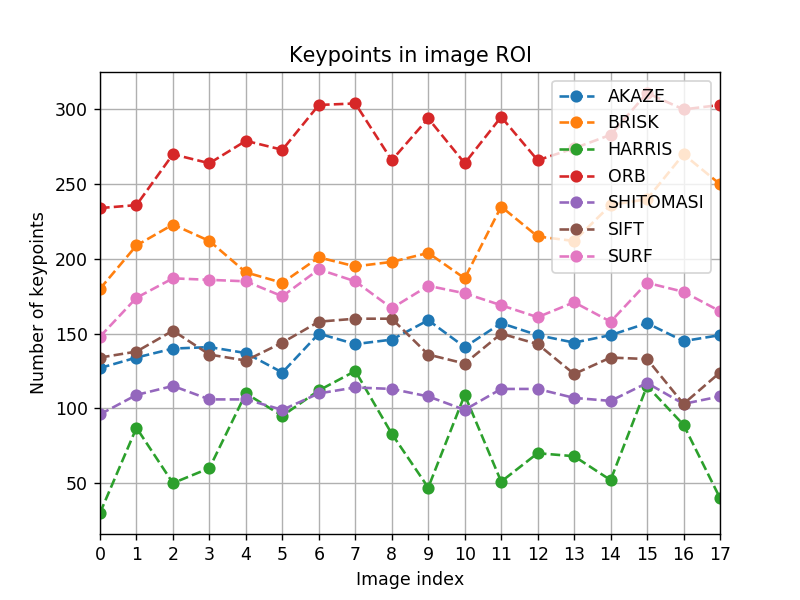

(0, 17)

In [36]:
%matplotlib notebook
for name in det_names:
    #feature_count_avg.append(df[df["detector_type"] == name].iloc[0]["feature_count"])
    plt.plot(df[df["detector_type"] == name].iloc[0]["kp_roi_count"], '--o')
    
plt.legend(det_names, loc="upper right")
plt.grid()
plt.title('Keypoints in image ROI')
plt.xlabel('Image index')
plt.ylabel('Number of keypoints')
plt.xticks(range(0,18))
plt.xlim(0, 17)


## 3. Plot Number of Matches in ROI

In [105]:
%matplotlib notebook
'''
for name in det_names:
    #feature_count_avg.append(df[df["detector_type"] == name].iloc[0]["feature_count"])
    plt.plot(df[df["detector_type"] == name].iloc[0]["kp_roi_matches"], '--o')
    
plt.legend(det_names, loc="upper right")
plt.grid()
plt.title('Feature matches in image ROI')
plt.xlabel('Image index')
plt.ylabel('Number of Features')
plt.xticks(range(0,18))
plt.xlim(0, 17)
'''

'\nfor name in det_names:\n    #feature_count_avg.append(df[df["detector_type"] == name].iloc[0]["feature_count"])\n    plt.plot(df[df["detector_type"] == name].iloc[0]["kp_roi_matches"], \'--o\')\n    \nplt.legend(det_names, loc="upper right")\nplt.grid()\nplt.title(\'Feature matches in image ROI\')\nplt.xlabel(\'Image index\')\nplt.ylabel(\'Number of Features\')\nplt.xticks(range(0,18))\nplt.xlim(0, 17)\n'

<IPython.core.display.Javascript object>


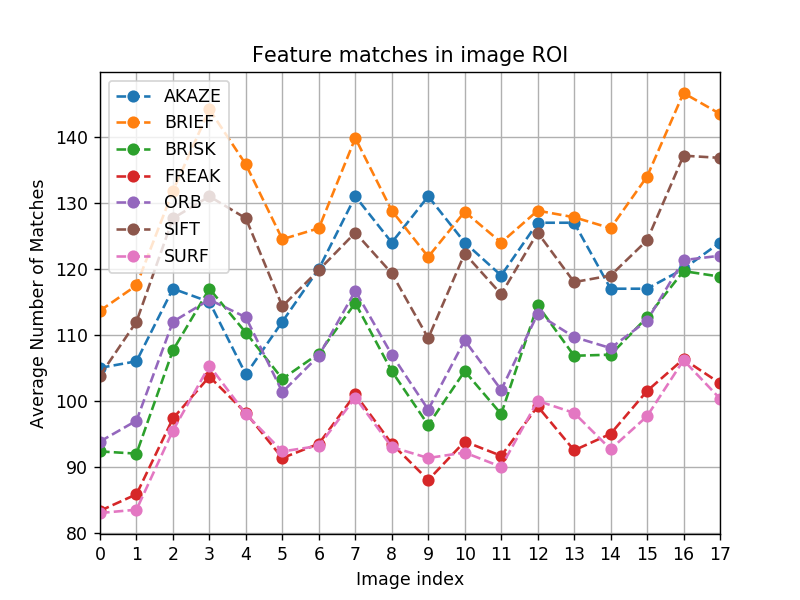

(0, 17)

In [110]:
%matplotlib notebook
for name in des_names:
    sum = np.zeros(np.array(df[df["descriptor_type"] == "AKAZE"].iloc[0]["kp_roi_matches"]).shape)
    #print(name)
    for i in range(df[df["descriptor_type"] == name].shape[0]):
        sum += np.array(df[df["descriptor_type"] == name].iloc[i]["kp_roi_matches"])
        #print(df[df["descriptor_type"] == name].iloc[i]["kp_roi_matches"])
    avg = sum/(i+1)
    #print("avg: ", avg)
    plt.plot(avg, '--o')
    
plt.legend(des_names, loc="upper left")
plt.grid()
plt.title('Feature matches in image ROI')
plt.xlabel('Image index')
plt.ylabel('Average Number of Matches')
plt.xticks(range(0,18))
plt.xlim(0, 17)

## 4. Plot Time To Collision Estimate with Lidar

<IPython.core.display.Javascript object>


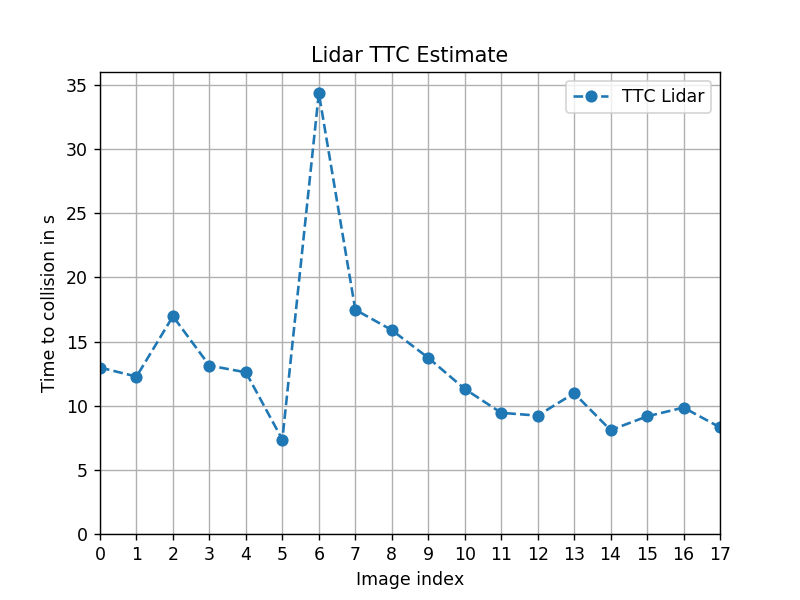

(0, 36)

In [38]:
%matplotlib notebook
#plt.plot(df[df["descriptor_type"] == "BRISK"].iloc[0]["ttc_lidar"], '--o')
plt.plot(df[df["descriptor_type"] == "AKAZE"].iloc[0]["ttc_lidar"], '--o')
#plt.plot(df[df["descriptor_type"] == "BRIEF"].iloc[0]["ttc_lidar"], '--o')
#for name in des_names:
#    #feature_count_avg.append(df[df["detector_type"] == name].iloc[0]["feature_count"])
#    plt.plot(df[df["descriptor_type"] == name].iloc[0]["ttc_camera"], '--o')
    
#plt.legend(["TTC Lidar"] + det_names)
plt.legend(["TTC Lidar"])
plt.grid()
plt.title('Lidar TTC Estimate')
plt.xlabel('Image index')
plt.ylabel('Time to collision in s')
plt.xticks(range(0,18))

plt.xlim(0, 17)
plt.ylim(0, 36)

## 5. Plot Time To Collision Estimate with Camera

<IPython.core.display.Javascript object>


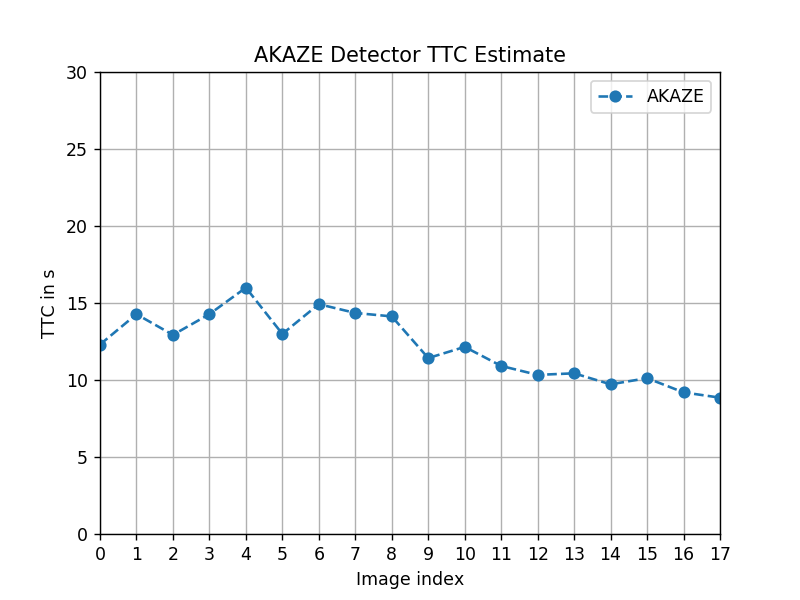

<IPython.core.display.Javascript object>


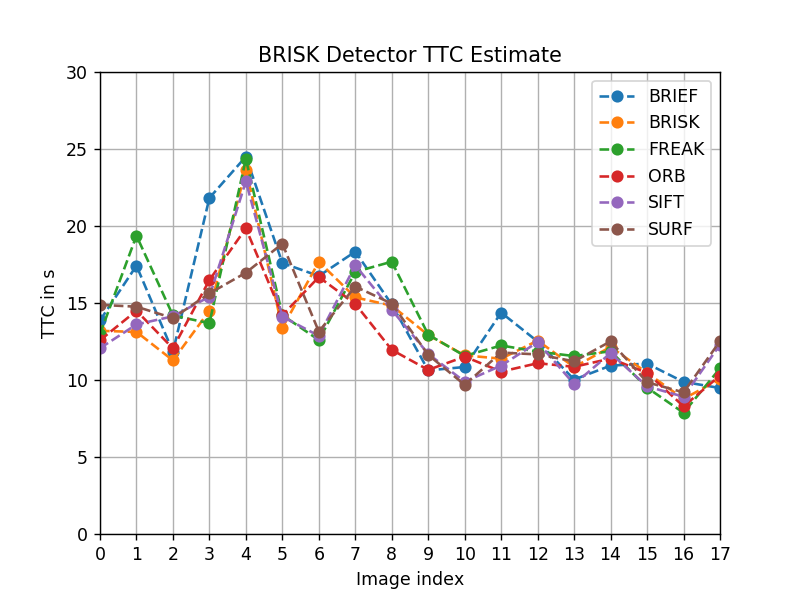

<IPython.core.display.Javascript object>


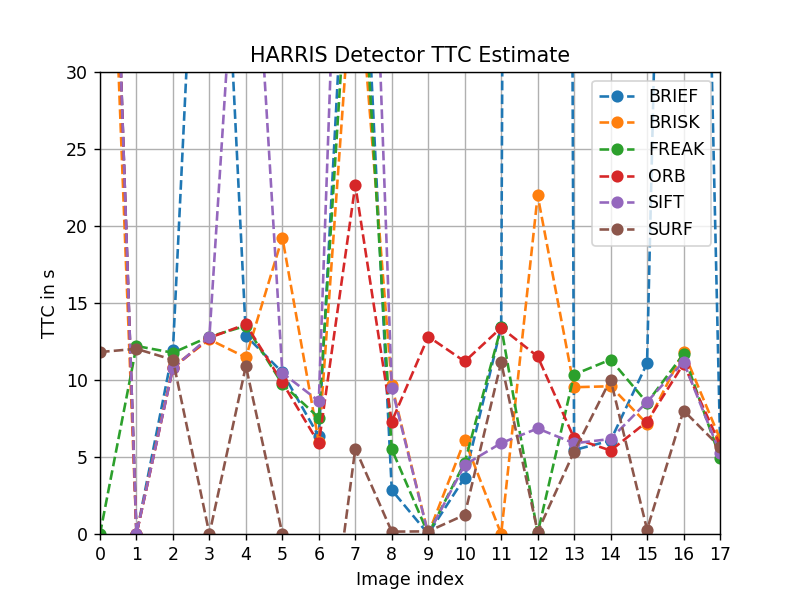

<IPython.core.display.Javascript object>


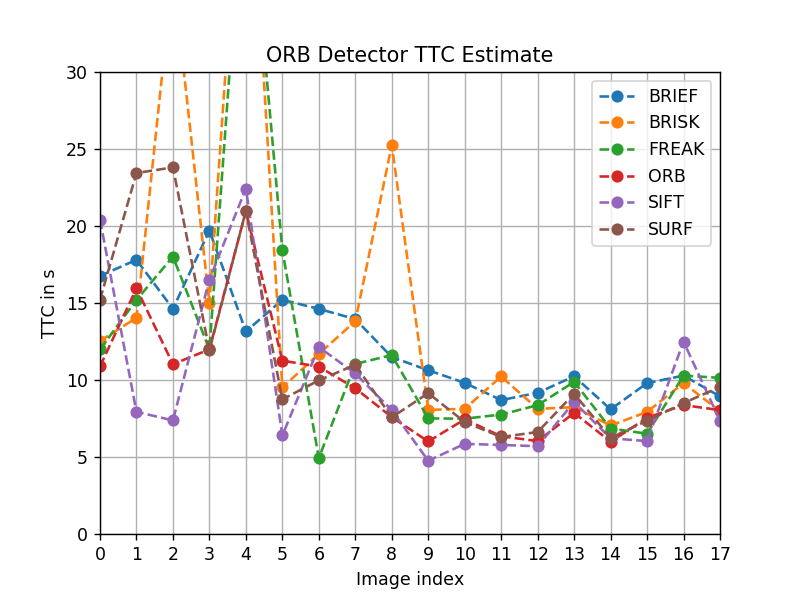

<IPython.core.display.Javascript object>


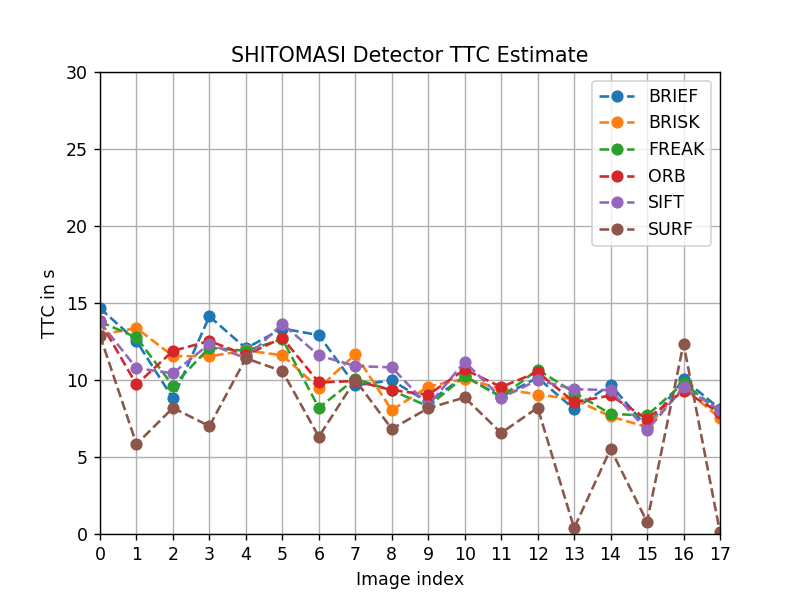

<IPython.core.display.Javascript object>


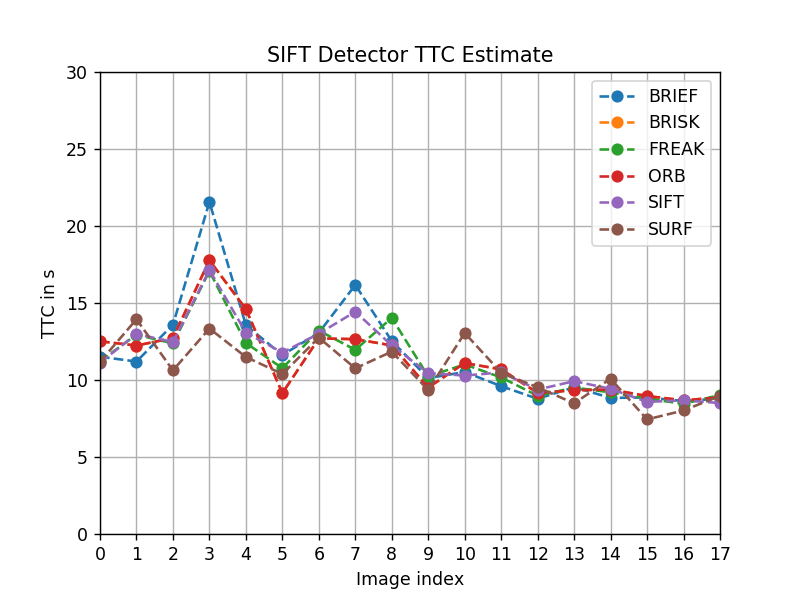

<IPython.core.display.Javascript object>


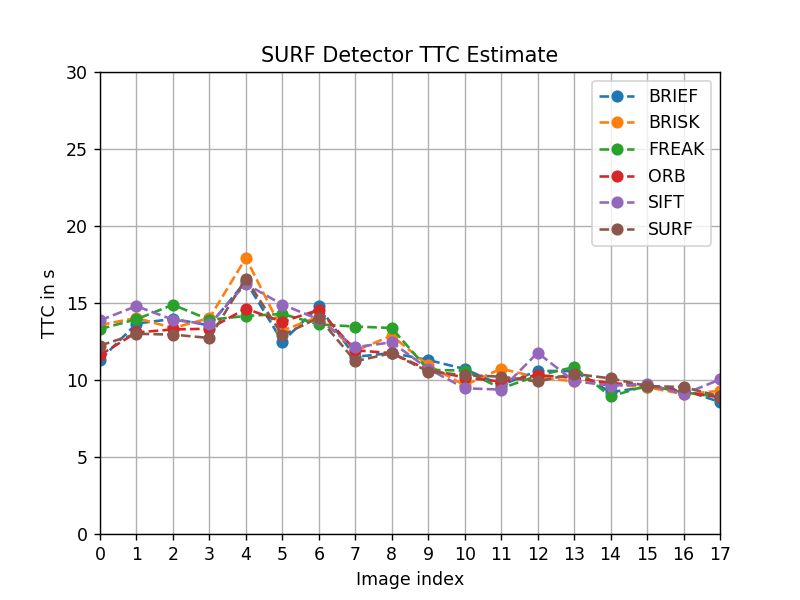

In [39]:
%matplotlib notebook

def format_fig(ax, det_name, legend):
    ax.legend(legend)
    ax.grid()
    #ax.set_title('Camera TTC Estimate (' + det_name + ' Detector)')
    ax.set_title(det_name + ' Detector TTC Estimate')
    ax.set_xlabel('Image index')
    ax.set_ylabel('TTC in s')
    ax.set_xticks(range(0,18))
    ax.set_xlim(0, 17)
    ax.set_ylim(0,30)
 
#AKAZE plot
fig_idx = 1
    
plt.figure(fig_idx)
plt.plot(df[df["descriptor_type"] == "AKAZE"].iloc[0]["ttc_camera"], '--o')
ax = plt.gca()
format_fig(ax, "AKAZE", ["AKAZE"])

#plot remaining detectors
det_idx = 0
for fig_idx in range(2,8):
    plt.figure(fig_idx)
    for name in des_names[1:]:
        plt.plot(df[df["descriptor_type"] == name].iloc[det_idx]["ttc_camera"], '--o')
        ax = plt.gca()
        #print(df[df["descriptor_type"] == name].iloc[det_idx]["detector_type"])
        det_name = df[df["descriptor_type"] == name].iloc[det_idx]["detector_type"]
        #format_fig(ax, det_name, des_names[1:])
    det_idx += 1
    format_fig(ax, det_name, des_names[1:])

### 6. Calculate Statistical Parameters for Camera TTC

#### 6.1 Standard Deviation

In [111]:
print("Standard deviation of Camera-based TTC in s")
print("(rows are detectors, cols are descriptors)")

def get_param(data):
    return np.std(data)

match_matrix = np.zeros((len(det_names), len(des_names)))
match_matrix.shape

#AKAZE detector
data = df[df["descriptor_type"] == "AKAZE"].iloc[0]["ttc_camera"]
match_matrix[0,0] = get_param(data)

det_idx = 0
for det_idx in range(0,6):
    for name in des_names[1:]:
        data = df[df["descriptor_type"] == name].iloc[det_idx]["ttc_camera"]
        det_name = df[df["descriptor_type"] == name].iloc[det_idx]["detector_type"]
        match_matrix[det_names.index(det_name), des_names.index(name)] = get_param(data)

a = pd.DataFrame(np.array(match_matrix, dtype=np.float32))
a.columns = des_names
a.index = det_names
a

Standard deviation of Camera-based TTC in s
(rows are detectors, cols are descriptors)


,AKAZE,BRIEF,BRISK,FREAK,ORB,SIFT,SURF
AKAZE,2.101998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BRISK,0.000000,4.228626,3.268277,3.754437,2.798852,3.222007,2.586031
HARRIS,0.000000,130.756348,14.591534,9.509863,14.621615,22.362022,6.246675
ORB,0.000000,3.362421,10.978315,8.616899,3.744164,5.070323,5.577795
SHITOMASI,0.000000,2.188974,1.859710,1.835850,1.681298,1.794439,3.694142
SIFT,0.000000,3.184526,2.362003,2.173920,2.362003,2.222776,1.807771
SURF,0.000000,2.088814,2.323648,2.116485,1.831727,2.240489,1.893380


In [112]:
ranking = []
for row in range(a.shape[0]):
    for col in range(a.shape[1]):
        detector_name = a.index.values[row]
        descriptor_name = a.columns.values[col]
        value = a.iloc[row, col]
        ranking.append([detector_name, descriptor_name, value])
        
ranking.sort(key=lambda v:v[2], reverse=False)
# remove invalid elements
ranking = [item for item in ranking if item[2] != 0]
b = pd.DataFrame(ranking)
b.columns = ['Detector', 'Descriptor', 'Standard deviation of TTC in s']
b.head(10)
b

,Detector,Descriptor,Standard deviation of TTC in s
0,SHITOMASI,ORB,1.681298
1,SHITOMASI,SIFT,1.794439
2,SIFT,SURF,1.807771
3,SURF,ORB,1.831727
4,SHITOMASI,FREAK,1.835850
5,SHITOMASI,BRISK,1.859710
6,SURF,SURF,1.893380
7,SURF,BRIEF,2.088814
8,AKAZE,AKAZE,2.101998
9,SURF,FREAK,2.116485


#### 6.2 Mean

In [113]:
print("Mean of Camera-based TTC in s")
print("(rows are detectors, cols are descriptors)")

def get_param(data):
    return np.mean(data)

match_matrix = np.zeros((len(det_names), len(des_names)))
match_matrix.shape

#AKAZE detector
data = df[df["descriptor_type"] == "AKAZE"].iloc[0]["ttc_camera"]
match_matrix[0,0] = get_param(data)

det_idx = 0
for det_idx in range(0,6):
    for name in des_names[1:]:
        data = df[df["descriptor_type"] == name].iloc[det_idx]["ttc_camera"]
        det_name = df[df["descriptor_type"] == name].iloc[det_idx]["detector_type"]
        match_matrix[det_names.index(det_name), des_names.index(name)] = get_param(data)

a = pd.DataFrame(np.array(match_matrix, dtype=np.float32))
a.columns = des_names
a.index = det_names
a



Mean of Camera-based TTC in s
(rows are detectors, cols are descriptors)


,AKAZE,BRIEF,BRISK,FREAK,ORB,SIFT,SURF
AKAZE,12.184277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BRISK,0.000000,14.264562,13.207990,13.680792,12.686124,13.018691,13.295806
HARRIS,0.000000,53.525177,13.462987,10.151678,13.217950,16.778963,4.516863
ORB,0.000000,12.386918,14.600883,12.364402,9.646594,9.691576,11.262933
SHITOMASI,0.000000,10.490966,10.034502,10.052206,10.188605,10.394018,7.222570
SIFT,0.000000,11.582827,11.238501,11.185291,11.238501,11.332591,10.650372
SURF,0.000000,11.607947,11.892748,11.859385,11.481526,11.976696,11.500219


In [115]:
ranking = []
for row in range(a.shape[0]):
    for col in range(a.shape[1]):
        detector_name = a.index.values[row]
        descriptor_name = a.columns.values[col]
        value = a.iloc[row, col]
        ranking.append([detector_name, descriptor_name, value])
        
ranking.sort(key=lambda v:v[2], reverse=False)
# remove invalid elements
ranking = [item for item in ranking if item[2] != 0]
b = pd.DataFrame(ranking)
b.columns = ['Detector', 'Descriptor', 'Mean TTC in s']
b.head(10)
b

,Detector,Descriptor,Mean TTC in s
0,HARRIS,SURF,4.516863
1,SHITOMASI,SURF,7.222570
2,ORB,ORB,9.646594
3,ORB,SIFT,9.691576
4,SHITOMASI,BRISK,10.034502
5,SHITOMASI,FREAK,10.052206
6,HARRIS,FREAK,10.151678
7,SHITOMASI,ORB,10.188605
8,SHITOMASI,SIFT,10.394018
9,SHITOMASI,BRIEF,10.490966


#### 6.3 Minimum

In [120]:
print("Minimum of Camera-based TTC in s")
print("(rows are detectors, cols are descriptors)")

def get_param(data):
    return np.min(data)

match_matrix = np.zeros((len(det_names), len(des_names)))
match_matrix.shape

#AKAZE detector
data = df[df["descriptor_type"] == "AKAZE"].iloc[0]["ttc_camera"]
match_matrix[0,0] = get_param(data)

det_idx = 0
for det_idx in range(0,6):
    for name in des_names[1:]:
        data = df[df["descriptor_type"] == name].iloc[det_idx]["ttc_camera"]
        det_name = df[df["descriptor_type"] == name].iloc[det_idx]["detector_type"]
        match_matrix[det_names.index(det_name), des_names.index(name)] = get_param(data)

a = pd.DataFrame(np.array(match_matrix, dtype=np.float32))
a.columns = des_names
a.index = det_names
a


Minimum of Camera-based TTC in s
(rows are detectors, cols are descriptors)


,AKAZE,BRIEF,BRISK,FREAK,ORB,SIFT,SURF
AKAZE,8.852358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BRISK,0.000000,9.477305,8.772138,7.871354,8.289896,8.915570,9.197112
HARRIS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.497360
ORB,0.000000,8.095068,7.048142,4.930591,5.994634,4.758458,6.240874
SHITOMASI,0.000000,6.930690,6.943670,7.695889,7.474850,6.737039,0.104783
SIFT,0.000000,8.635463,8.679540,8.454138,8.679540,8.503808,7.440587
SURF,0.000000,8.569801,9.084507,8.894536,8.871870,9.072974,8.938663


In [123]:
ranking = []
for row in range(a.shape[0]):
    for col in range(a.shape[1]):
        detector_name = a.index.values[row]
        descriptor_name = a.columns.values[col]
        value = a.iloc[row, col]
        ranking.append([detector_name, descriptor_name, value])
        
ranking.sort(key=lambda v:v[2], reverse=False)
# remove invalid elements
ranking = [item for item in ranking if item[2] != 0]
b = pd.DataFrame(ranking)
b.columns = ['Detector', 'Descriptor', 'Minimum TTC in s']
b.head(10)
b

,Detector,Descriptor,Minimum TTC in s
0,HARRIS,SURF,-12.497360
1,SHITOMASI,SURF,0.104783
2,ORB,SIFT,4.758458
3,ORB,FREAK,4.930591
4,ORB,ORB,5.994634
5,ORB,SURF,6.240874
6,SHITOMASI,SIFT,6.737039
7,SHITOMASI,BRIEF,6.930690
8,SHITOMASI,BRISK,6.943670
9,ORB,BRISK,7.048142


In [122]:
ranking = []
for row in range(a.shape[0]):
    for col in range(a.shape[1]):
        detector_name = a.index.values[row]
        descriptor_name = a.columns.values[col]
        value = a.iloc[row, col]
        ranking.append([detector_name, descriptor_name, value])
        
ranking.sort(key=lambda v:v[2], reverse=False)
# remove invalid elements
ranking = [item for item in ranking if item[2] != 0]
b = pd.DataFrame(ranking)
b.columns = ['Detector', 'Descriptor', 'Minimum TTC in s']
b.head(10)
b

,Detector,Descriptor,Minimum TTC in s
0,HARRIS,SURF,-12.497360
1,SHITOMASI,SURF,0.104783
2,ORB,SIFT,4.758458
3,ORB,FREAK,4.930591
4,ORB,ORB,5.994634
5,ORB,SURF,6.240874
6,SHITOMASI,SIFT,6.737039
7,SHITOMASI,BRIEF,6.930690
8,SHITOMASI,BRISK,6.943670
9,ORB,BRISK,7.048142


#### 6.4 Maximum

In [118]:
print("Maximum of Camera-based TTC in s")
print("(rows are detectors, cols are descriptors)")

def get_param(data):
    return np.max(data)

match_matrix = np.zeros((len(det_names), len(des_names)))
match_matrix.shape

#AKAZE detector
data = df[df["descriptor_type"] == "AKAZE"].iloc[0]["ttc_camera"]
match_matrix[0,0] = get_param(data)

det_idx = 0
for det_idx in range(0,6):
    for name in des_names[1:]:
        data = df[df["descriptor_type"] == name].iloc[det_idx]["ttc_camera"]
        det_name = df[df["descriptor_type"] == name].iloc[det_idx]["detector_type"]
        match_matrix[det_names.index(det_name), des_names.index(name)] = get_param(data)

a = pd.DataFrame(np.array(match_matrix, dtype=np.float32))
a.columns = des_names
a.index = det_names
a

Maximum of Camera-based TTC in s
(rows are detectors, cols are descriptors)


,AKAZE,BRIEF,BRISK,FREAK,ORB,SIFT,SURF
AKAZE,15.995298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BRISK,0.000000,24.505154,23.665430,24.354773,19.842981,22.903040,18.850052
HARRIS,0.000000,578.411072,61.001472,44.667061,70.367203,75.375893,12.022412
ORB,0.000000,19.705738,48.994614,44.570751,20.965059,22.427620,23.804667
SHITOMASI,0.000000,14.661151,13.369449,13.787548,13.813048,13.761609,12.882219
SIFT,0.000000,21.563360,17.771744,17.072134,17.771744,17.139326,13.940989
SURF,0.000000,16.400112,17.924107,14.883186,14.632832,16.239170,16.589455


In [119]:
ranking = []
for row in range(a.shape[0]):
    for col in range(a.shape[1]):
        detector_name = a.index.values[row]
        descriptor_name = a.columns.values[col]
        value = a.iloc[row, col]
        ranking.append([detector_name, descriptor_name, value])
        
ranking.sort(key=lambda v:v[2], reverse=False)
# remove invalid elements
ranking = [item for item in ranking if item[2] != 0]
b = pd.DataFrame(ranking)
b.columns = ['Detector', 'Descriptor', 'Maximum TTC in s']
b.head(10)
b

,Detector,Descriptor,Minimum TTC in s
0,HARRIS,SURF,12.022412
1,SHITOMASI,SURF,12.882219
2,SHITOMASI,BRISK,13.369449
3,SHITOMASI,SIFT,13.761609
4,SHITOMASI,FREAK,13.787548
5,SHITOMASI,ORB,13.813048
6,SIFT,SURF,13.940989
7,SURF,ORB,14.632832
8,SHITOMASI,BRIEF,14.661151
9,SURF,FREAK,14.883186


### 7. Plots with Best Performing Candinates

<IPython.core.display.Javascript object>


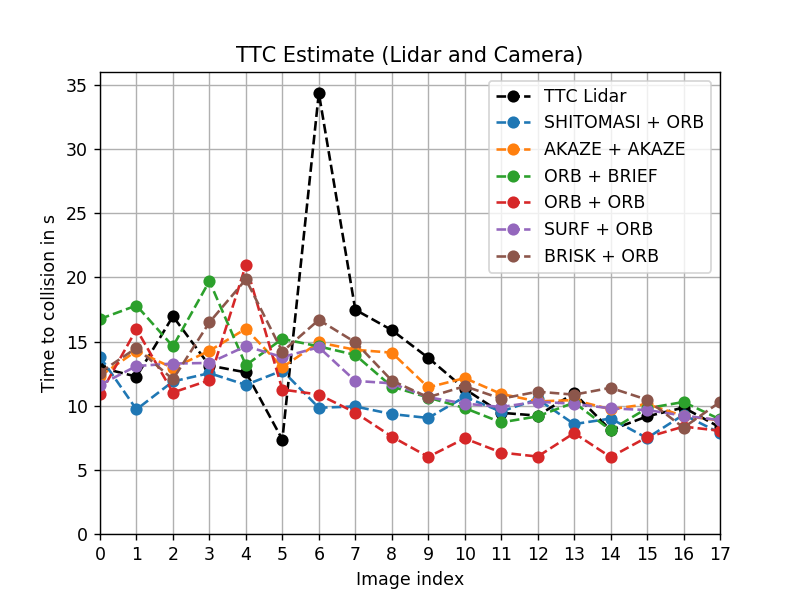

(0, 36)

In [124]:
%matplotlib notebook

det_list = ["SHITOMASI", "AKAZE", "ORB", "ORB", "SURF", "BRISK"]
des_list = ["ORB", "AKAZE", "BRIEF", "ORB", "ORB", "ORB"]
legend = ["TTC Lidar"]

x_data = df[df["descriptor_type"] == "AKAZE"].iloc[0]["ttc_lidar"]
plt.plot(x_data, '--ko')

for det, des in zip(det_list, des_list):
    x_data = df[(df.detector_type == det) & (df.descriptor_type == des)].iloc[0]["ttc_camera"]
    plt.plot(x_data, '--o')
    #legend.append(det + " detector + " + des + "descriptor")
    legend.append(det + " + " + des)
    
plt.legend(legend)
plt.grid()
plt.title('TTC Estimate (Lidar and Camera)')
plt.xlabel('Image index')
plt.ylabel('Time to collision in s')
plt.xticks(range(0,18))

plt.xlim(0, 17)
plt.ylim(0, 36)

<IPython.core.display.Javascript object>


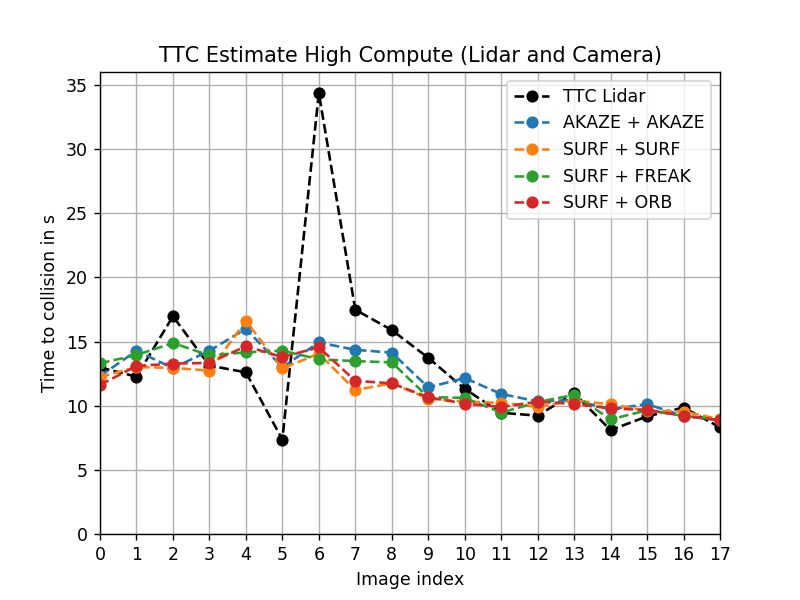

(0, 36)

In [130]:
%matplotlib notebook

det_list = ["AKAZE", "SURF", "SURF", "SURF"]
des_list = ["AKAZE", "SURF", "FREAK", "ORB"]
legend = ["TTC Lidar"]

x_data = df[df["descriptor_type"] == "AKAZE"].iloc[0]["ttc_lidar"]
plt.plot(x_data, '--ko')

for det, des in zip(det_list, des_list):
    x_data = df[(df.detector_type == det) & (df.descriptor_type == des)].iloc[0]["ttc_camera"]
    plt.plot(x_data, '--o')
    #legend.append(det + " detector + " + des + "descriptor")
    legend.append(det + " + " + des)
    
plt.legend(legend)
plt.grid()
plt.title('TTC Estimate High Compute (Lidar and Camera)')
plt.xlabel('Image index')
plt.ylabel('Time to collision in s')
plt.xticks(range(0,18))

plt.xlim(0, 17)
plt.ylim(0, 36)

<IPython.core.display.Javascript object>


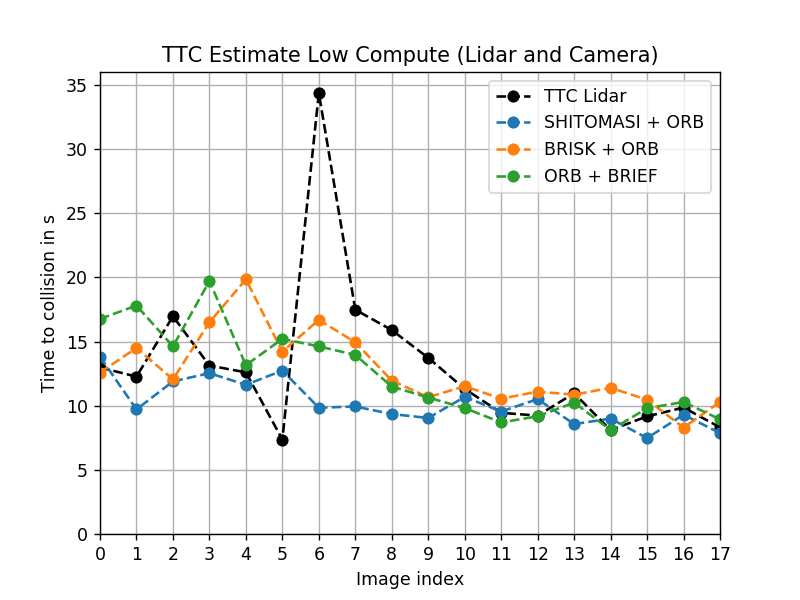

(0, 36)

In [132]:
%matplotlib notebook

det_list = ["SHITOMASI", "BRISK", "ORB"]
des_list = ["ORB", "ORB", "BRIEF"]
legend = ["TTC Lidar"]

x_data = df[df["descriptor_type"] == "AKAZE"].iloc[0]["ttc_lidar"]
plt.plot(x_data, '--ko')

for det, des in zip(det_list, des_list):
    x_data = df[(df.detector_type == det) & (df.descriptor_type == des)].iloc[0]["ttc_camera"]
    plt.plot(x_data, '--o')
    #legend.append(det + " detector + " + des + "descriptor")
    legend.append(det + " + " + des)
    
plt.legend(legend)
plt.grid()
plt.title('TTC Estimate Low Compute (Lidar and Camera)')
plt.xlabel('Image index')
plt.ylabel('Time to collision in s')
plt.xticks(range(0,18))

plt.xlim(0, 17)
plt.ylim(0, 36)